In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from surprise import SVD, accuracy, Dataset, NormalPredictor,SVDpp
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
df = movies.merge(ratings)

In [6]:
df.drop(['timestamp'], axis=1, inplace=True)

In [7]:
# Extract the year from each movie title to create a year release year column for each movie
df['year'] = df.title.str.extract("\((\d{4})\)", expand=True)
df.year = pd.to_datetime(df.year, format='%Y')

In [8]:
df.head()

,movieId,title,genres,userId,rating,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,1995-01-01
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,1995-01-01
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1995-01-01
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,1995-01-01
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,1995-01-01


In [9]:
df.loc[df.year.isnull()]

,movieId,title,genres,userId,rating,year
99426,143410,Hyena Road,(no genres listed),624,2.0,NaT
99488,151307,The Lovers and the Despot,(no genres listed),547,4.5,NaT


Text(0, 0.5, 'Number of movies released')

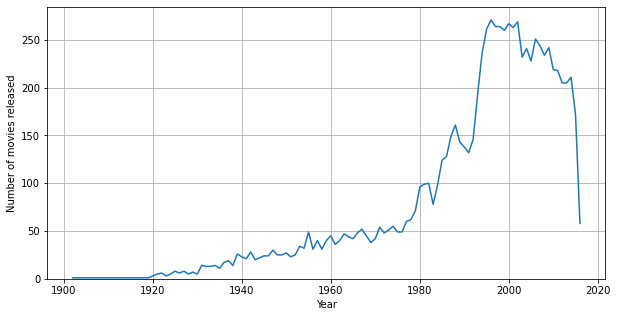

In [10]:
movies_per_year = df[['movieId', 'year']].groupby('year')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(movies_per_year.year.first(), movies_per_year.movieId.nunique())
ax.grid(None)
ax.set_ylim(0,)
ax.set_xlabel('Year')
ax.set_ylabel('Number of movies released')

In [11]:
df_movies_cnt = pd.DataFrame(df.groupby('movieId').size(), columns=['count'])
df_movies_cnt.head()

,count
movieId,
1,247
2,107
3,59
4,13
5,56


Text(0, 0.5, 'number of ratings')

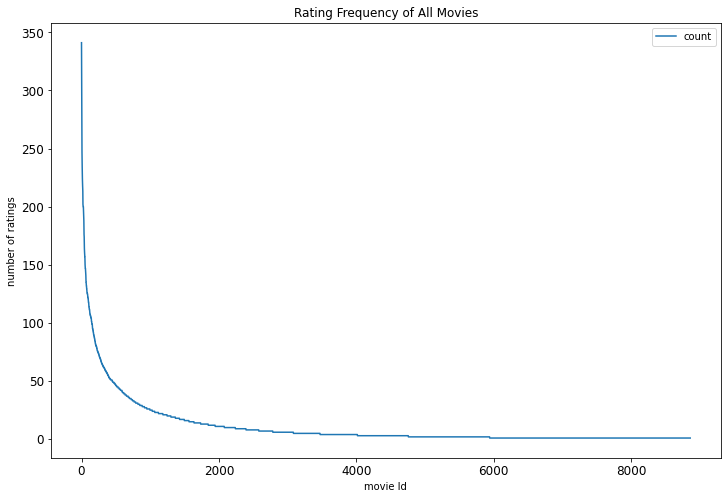

In [12]:
ax = df_movies_cnt \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

# Model

In [13]:
print('Length of Movies dataset:', movies.shape[0],'rows')
print('Length of Ratings dataset:', ratings.shape[0],'rows')

Length of Movies dataset: 62423 rows
Length of Ratings dataset: 100004 rows


In [14]:
ratings = ratings.drop('timestamp',axis=1)

In [20]:
# Set the reader variable

reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings,reader)

# Instantiate the model
SVD1_model = SVDpp()


# Train Test Split method
X_train, X_test = train_test_split(data,test_size=0.2)

In [21]:
SVD1_model.fit(X_train)

In [22]:
predictions = SVD1_model.test(X_test)

In [23]:
accuracy.rmse(predictions)

RMSE: 0.8899


0.8899254076579886

In [24]:
import pickle

model_save_path = 'SVD1_model.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(SVD1_model, file)